<a href="https://www.kaggle.com/code/abdelazizsami/project-reveal-categories-found-in-data?scriptVersionId=198417519" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

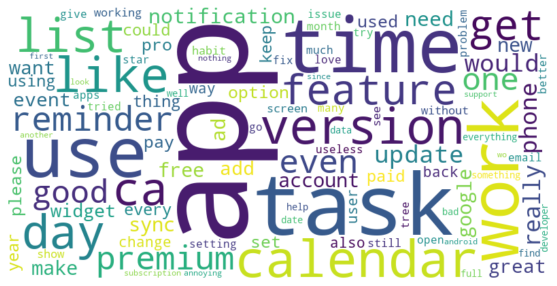

As a Data Scientist working for a mobile app company, you usually find yourself applying product analytics to better understand user behavior, uncover patterns, and reveal insights to identify the great and not-so-great features. Recently, the number of negative reviews has increased on Google Play, and as a consequence, the app's rating has been decreasing. The team has requested you to analyze the situation and make sense of the negative reviews.

It's up to you to apply K-means clustering from scikit-learn and NLP techniques through NLTK to sort text data from negative reviews in the Google Play Store into categories!

## The Data

A dataset has been shared with a sample of reviews and their respective scores (from 1 to 5) in the Google Play Store. A summary and preview are provided below.

# reviews.csv

| Column     | Description              |
|------------|--------------------------|
| `'content'` | Content (text) of each review. |
| `'score'` | Score assigned to the review by the user as an integer (from 1 to 5). |

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
# Download necessary files from NLTK:
# punkt -> Tokenization
# stopwords -> Stop words removal
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Load the reviews dataset and preview it
reviews = pd.read_csv("/kaggle/input/reveal-categories-found-in-data/reviews.csv")
reviews.head()

,content,score
0,I cannot open the app anymore,1
1,I have been begging for a refund from this app...,1
2,Very costly for the premium version (approx In...,1
3,"Used to keep me organized, but all the 2020 UP...",1
4,Dan Birthday Oct 28,1


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary files from NLTK:
# punkt -> Tokenization
# stopwords -> Stop words removal
nltk.download("punkt")
nltk.download("stopwords")

# Load the reviews dataset and preview it
reviews = pd.read_csv("/kaggle/input/reveal-categories-found-in-data/reviews.csv")
reviews.head()

# Step 1: Preprocess the negative reviews

# Filter negative reviews (having a score of 1 or 2)
negative_reviews_tmp = reviews[(reviews["score"] == 1) | (reviews["score"] == 2)]["content"]

def preprocess_text(text):
    """Performs all the required steps in the text preprocessing"""

    # Tokenizing the text
    tokens = word_tokenize(text)

    # Removing stop words and non-alpha characters
    filtered_tokens = [
        token
        for token in tokens
        if token.isalpha() and token.lower() not in stopwords.words("english")
    ]

    return " ".join(filtered_tokens)


# Apply the preprocessing function to the negative reviews
negative_reviews_cleaned = negative_reviews_tmp.apply(preprocess_text)

# Store the preprocessed negative reviews in a pandas DataFrame
preprocessed_reviews = pd.DataFrame({"review": negative_reviews_cleaned})
preprocessed_reviews.head()

# Step 2: Vectorize the cleaned negative reviews using TF-IDF

# Vectorize the cleaned reviews using TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(preprocessed_reviews["review"])

# Step 3: Apply K-means clustering to tfidf_matrix

# Apply K-means clustering (store the model as clust_kmeans)
clust_kmeans = KMeans(n_clusters=5, random_state=500)
pred_labels = clust_kmeans.fit_predict(tfidf_matrix)

# Store the predicted labels in a list variable called categories
categories = pred_labels.tolist()
preprocessed_reviews["category"] = categories

# Step 4: For each unique cluster label, find the most frequent term

# Get the feature names (terms) from the vectorizer
terms = vectorizer.get_feature_names_out()

# List to save the top term for each cluster
topic_terms_list = []

for cluster in range(clust_kmeans.n_clusters):
    # Get indices of reviews in the current cluster
    cluster_indices = [i for i, label in enumerate(categories) if label == cluster]

    # Sum the tf-idf scores for each term in the cluster
    cluster_tfidf_sum = tfidf_matrix[cluster_indices].sum(axis=0)
    cluster_term_freq = np.asarray(cluster_tfidf_sum).ravel()

    # Get the top term and its frequencies
    top_term_index = cluster_term_freq.argsort()[::-1][0]

    # Append rows to the topic_terms DataFrame with three fields:
    # - category: label / cluster assigned from K-means
    # - term: the identified top term
    # - frequency: term's weight for the category
    topic_terms_list.append(
        {
            "category": cluster,
            "term": terms[top_term_index],
            "frequency": cluster_term_freq[top_term_index],
        }
    )

# Pandas DataFrame to store results from this step
topic_terms = pd.DataFrame(topic_terms_list)

# Output the final result
print(topic_terms)


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   category      term   frequency
0         0   version   61.620508
1         1   premium   65.863750
2         2       app  184.225204
3         3  calendar   69.281968
4         4      good   37.159921
